# USING CUSTOMER REVIEWS TO GUIDE PRODUCT DEVELOPMENT STRATEGY
Panasonic is in electronics manufacturing business. Panasonic's division than makes LCD TV's is under pressure from the CEO to increase sales. The Chief Marketing Officer and the Chief Operations Officer of the company are strictly against changing the price of the TV's as they believe that on average Panasonic sells its TV's cheaper than its competitors which include Samsung, Sony, Toshiba, Vizio, LG and Philips. After brainstorming with his team, the TV division head Hiro Ito is determined that the only way forward is to improve the product quality. However, given the economic downturn the funds available for investing in R&D are quite limited. And the cost of improvement of any feature is exponentially increasing in the extent to which the feature is improved. Further, there are differences of opinion among his team regarding which aspect of their product they should improve.
After intensive discussion amongst themselves, they feel that they should try to gauge how they consumers thought of them in comparison to their competitors. They approached the new UGC sub‐ division within the marketing division. The UGC division was set up to capture what their customers were saying about them on the web. While this division was collecting a lot of data generated regarding Panasonic by its customers, UGC division head Yuji Hukiri was struggling with a way to show the business value of his division. This opportunity arrived at the right time for him and he was quite happy to help Hiro's team in the endeavor. They quickly decided that they would focus only on product reviews and collect data not only themselves but also on their competitors.

Yuji’s team quickly created an exhaustive list of all websites which provided customer generated product reviews including Amazon, Epinions, etc. They also decided to collect review information from experts (e.g., consumer report, etc.) regarding their and competitor's products. Using text mining and sentiment analysis tools they identified six features which the consumers talked the most about in their reviews: Video quality, Sound quality, Appearance, Number of Features, Ease of set up, and Life span. Yuji's team converted the text data regarding features into a numeric data on a scale of 0‐5, where 0 meant lowest satisfaction and 5 meant highest satisfaction for consumers. For example, if Panasonic got a rating of 4 and LG got a rating of 3 on video quality it would mean that on average customers are more satisfied regarding video quality of Panasonic than LG. Hiro's team was excited at getting this data but now they faced the issue of how to analyze this data. One of the team members suggests to focus on that feature of the product where they lag their competitors according to their consumers. She argues that this is how they have done in the past. However, Hiro is not fully convinced with this approach. He believes the data the UGC division provided is much richer and he may be able to get information on not only how they are rated in comparison to their competitors on various features but also on what features the consumers value the most. Hiro's team has approached you to analyze the data collected by the UGC division and help them in devising the appropriate strategy forward.

They want you to figure out where they stand in each feature (each user rating category) relative to their competitors, and if investing in the feature where users rate them lower than their competitors is the best strategy. If not, what would you recommend? They want to get a ranking for features in term of where they should consider investing first. Assume that the cost of improving the feature is same across all features. For example, the cost of improving the video quality so that the customer rating for video
1
quality goes from 4 to 5 is the same as that for improving the sound quality so that the rating for sound quality goes from 4 to 5.

In [ ]:
import pandas as pd
import numpy as np
import io

from google.colab import files
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['TA2.csv']))

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df.columns

Index(['Manufacturer', 'Screen Size', 'Motion Rate', 'Pixel', 'Overall Rating',
       'Video Quality', 'Sound quality', 'Appearance', 'Number of Features',
       'Ease of Set up', 'Life Span', 'Expert Overall Rating', 'size=26"',
       'size=32"', 'size=36"', 'size=40"', 'size=42"', 'size=46"', 'size=49"',
       'size=52"', 'size=55"', 'size=60"', 'motionrate=120', 'motionrate=240',
       'motionrate=600', 'Pixel=1080', 'Selling Price',
       'Yearly units sold in US'],
      dtype='object')

In [ ]:
# turn selling price into float
sp = df['Selling Price'].str[1:-3].replace(',','')
df['price_2'] = 0
for i in range(len(sp)):
  a = float(sp[i].replace(',', ''))
  df['price_2'][i] = a

# Where Panasonic stands in each feature (each user rating category) relative to their competitors? Which feature should they invest first?

Panasonic's ranks in each feature:

Appearance: 5th

Ease of Set up: 1st

Life Span: 1st

Number of Features: 3rd

Sound quality: 6th

Video Quality: 1st

Pnasonic performed amazingly in ease of set up, life span video quality. It performed weill in number of features. It did poor in sound quality and appearance.

As showned in the coefficeient plot below, among six features, the importance regard to revenue are ranked as:

	Coefficients
Video Quality:	281424

Number of Features:	200611

Ease of Set up: 124647

Appearance:	94178

Life Span:	40194

Sound quality:	20507

Thus, insead of investing features based on current customer rating rank, investing according to the feature importance above is most capital efficient.


In [9]:
pt1 = pd.pivot_table(df, values=['Video Quality', 'Sound quality', 'Appearance', 'Number of Features', 'Ease of Set up', 'Life Span'], 
               index='Manufacturer', aggfunc=[np.mean, np.median])
pt1

mean                                              \
             Appearance Ease of Set up Life Span Number of Features   
Manufacturer                                                          
LG             3.971932       3.601591  3.100909           4.225341   
Panasonic      3.586818       4.211136  4.637045           3.814205   
Philips        4.025114       3.209659  3.595909           2.903636   
Samsung        4.220114       3.883636  4.491136           4.378636   
Sharp          3.461023       3.191705  3.382955           3.361136   
Sony           3.964659       3.728977  4.102045           3.236818   
Toshiba        3.482841       3.403409  3.509318           3.433636   
Vizio          3.127045       3.400795  3.542273           3.154205   

                                             median                           \
             Sound quality Video Quality Appearance Ease of Set up Life Span   
Manufacturer                                                                   
LG                4.209659      3.415795      3.975          3.610     3.100   
Panasonic         3.503295      4.378523      3.580          4.195     4.630   
Philips           3.889773      3.391364      4.010          3.240     3.595   
Samsung           4.204205      4.131591      4.210          3.895     4.490   
Sharp             3.633750      3.572159      3.450          3.195     3.385   
Sony              4.081591      3.906250      3.960          3.730     4.100   
Toshiba           3.110114      3.056818      3.460          3.395     3.520   
Vizio             2.992386      3.104205      3.150          3.395     3.520   

                                                             
             Number of Features Sound quality Video Quality  
Manufacturer                                                 
LG                        4.230          4.20         3.400  
Panasonic                 3.840          3.48         4.375  
Philips                   2.910          3.92         3.395  
Samsung                   4.395          4.22         4.135  
Sharp                     3.405          3.64         3.595  
Sony                      3.240          4.08         3.900  
Toshiba                   3.440          3.10         3.050  
Vizio                     3.140          3.02         3.100

### Feature 1: Appearance
Among 8 brands, Panasonic ranks 5th in the feature.

In [6]:
fea = 'Appearance'

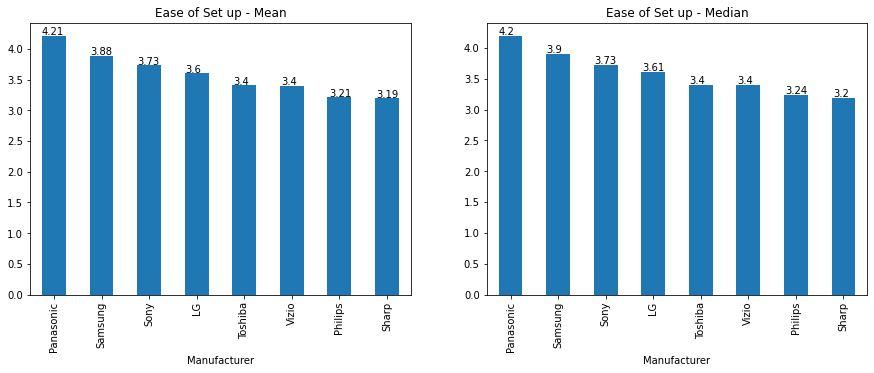

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

ax = pt1['mean'].loc[:,fea].sort_values(ascending=False).plot(kind='bar', ax=axes[0])
ax.set_title(fea+' - Mean')
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005))

ax = pt1['median'].loc[:,fea].sort_values(ascending=False).plot(kind='bar', ax=axes[1])
ax.set_title(fea+' - Median')
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005))

### Feature 2: Ease of Set up
Among 8 brands, Panasonic ranks 1st in the feature.

In [10]:
fea = 'Ease of Set up'

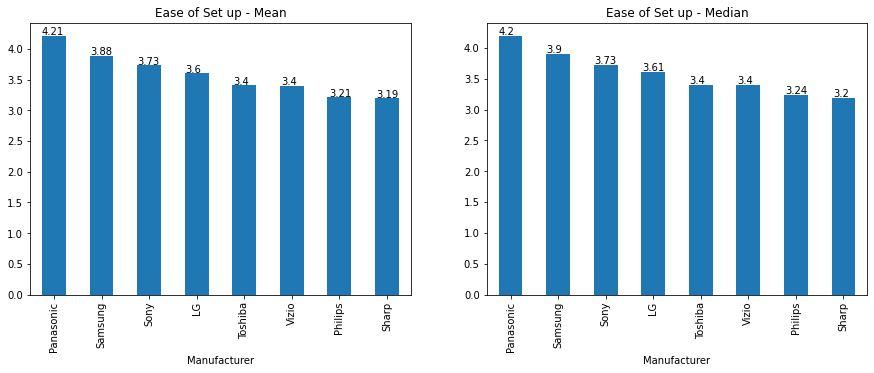

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

ax = pt1['mean'].loc[:,fea].sort_values(ascending=False).plot(kind='bar', ax=axes[0])
ax.set_title(fea+' - Mean')
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005))

ax = pt1['median'].loc[:,fea].sort_values(ascending=False).plot(kind='bar', ax=axes[1])
ax.set_title(fea+' - Median')
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005))

### Feature 3: Life Span
Among 8 brands, Panasonic ranks 1st in the feature.

In [13]:
fea = 'Life Span'

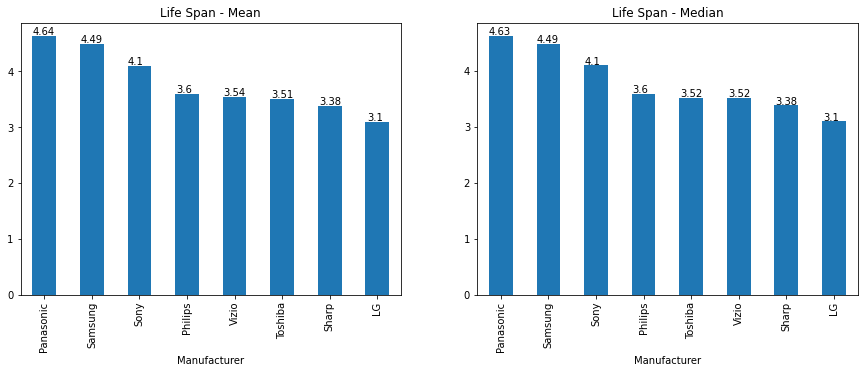

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

ax = pt1['mean'].loc[:,fea].sort_values(ascending=False).plot(kind='bar', ax=axes[0])
ax.set_title(fea+' - Mean')
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005))

ax = pt1['median'].loc[:,fea].sort_values(ascending=False).plot(kind='bar', ax=axes[1])
ax.set_title(fea+' - Median')
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005))

### Feature 4: Number of Features
Among 8 brands, Panasonic ranks 3rd in the feature.

In [15]:
fea = 'Number of Features'

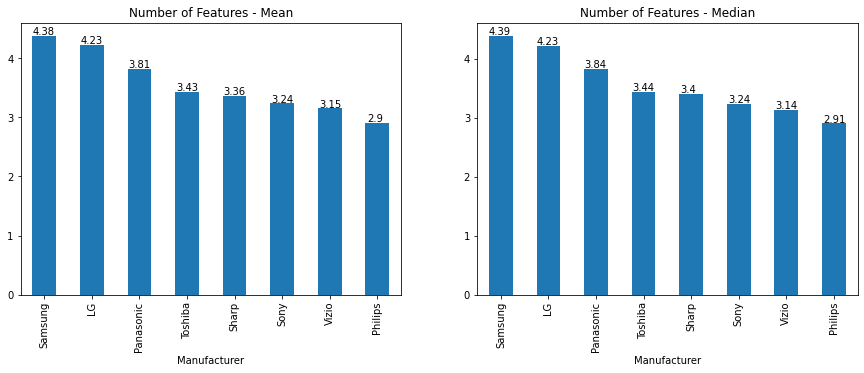

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

ax = pt1['mean'].loc[:,fea].sort_values(ascending=False).plot(kind='bar', ax=axes[0])
ax.set_title(fea+' - Mean')
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005))

ax = pt1['median'].loc[:,fea].sort_values(ascending=False).plot(kind='bar', ax=axes[1])
ax.set_title(fea+' - Median')
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005))

### Feature 5: Sound quality
Among 8 brands, Panasonic ranks 6th in the feature.

In [17]:
fea = 'Sound quality'

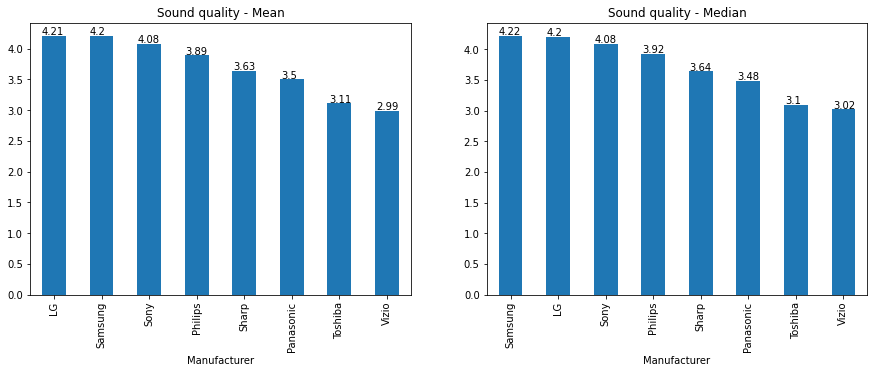

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

ax = pt1['mean'].loc[:,fea].sort_values(ascending=False).plot(kind='bar', ax=axes[0])
ax.set_title(fea+' - Mean')
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005))

ax = pt1['median'].loc[:,fea].sort_values(ascending=False).plot(kind='bar', ax=axes[1])
ax.set_title(fea+' - Median')
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005))

### Feature 6: Video Quality
Among 8 brands, Panasonic ranks 1st in the feature.

In [19]:
fea = 'Video Quality'

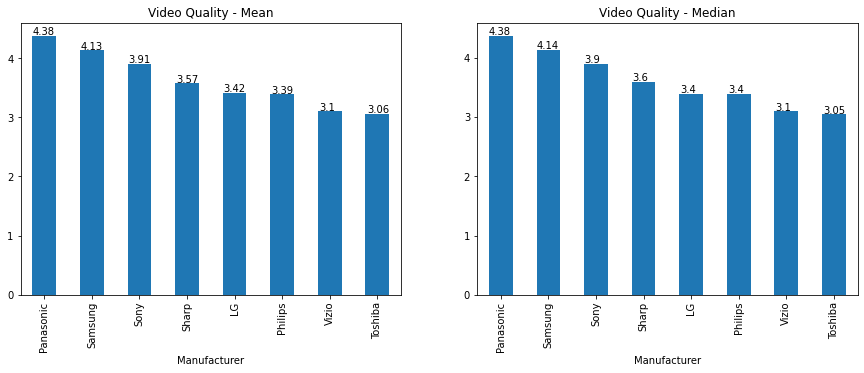

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

ax = pt1['mean'].loc[:,fea].sort_values(ascending=False).plot(kind='bar', ax=axes[0])
ax.set_title(fea+' - Mean')
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005))

ax = pt1['median'].loc[:,fea].sort_values(ascending=False).plot(kind='bar', ax=axes[1])
ax.set_title(fea+' - Median')
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005))

### Important features: Linear Regression Model

In [21]:
from sklearn.linear_model import LinearRegression
import sklearn.metrics
from sklearn.preprocessing import StandardScaler

In [22]:
df.columns

Index(['Manufacturer', 'Screen Size', 'Motion Rate', 'Pixel', 'Overall Rating',
       'Video Quality', 'Sound quality', 'Appearance', 'Number of Features',
       'Ease of Set up', 'Life Span', 'Expert Overall Rating', 'size=26"',
       'size=32"', 'size=36"', 'size=40"', 'size=42"', 'size=46"', 'size=49"',
       'size=52"', 'size=55"', 'size=60"', 'motionrate=120', 'motionrate=240',
       'motionrate=600', 'Pixel=1080', 'Selling Price',
       'Yearly units sold in US'],
      dtype='object')

In [90]:
x = df[['Video Quality', 'Sound quality', 'Appearance', 'Number of Features',
       'Ease of Set up', 'Life Span', 'size=26"',
       'size=32"', 'size=36"', 'size=40"', 'size=42"', 'size=46"', 'size=49"',
       'size=52"', 'size=55"', 'size=60"', 'motionrate=120', 'motionrate=240',
       'motionrate=600', 'Pixel=1080', 'price_2']]
x.head()

,Video Quality,Sound quality,Appearance,Number of Features,Ease of Set up,Life Span,"size=26""","size=32""","size=36""","size=40""",...,"size=46""","size=49""","size=52""","size=55""","size=60""",motionrate=120,motionrate=240,motionrate=600,Pixel=1080,price_2
0,3.34,4.12,3.61,4.33,3.38,2.99,0,0,0,0,...,0,0,0,0,0,0,0,0,0,430
1,3.30,4.07,4.12,4.55,4.08,3.04,0,0,0,0,...,0,0,0,0,0,0,0,0,1,535
2,3.38,4.37,4.07,4.11,3.40,3.13,0,0,0,0,...,0,0,0,0,0,1,0,0,0,495
3,3.37,4.16,4.25,4.14,3.37,3.29,0,0,0,0,...,0,0,0,0,0,1,0,0,1,540
4,3.54,4.57,4.10,4.23,3.76,3.13,0,0,0,0,...,0,0,0,0,0,0,1,0,0,545


### Model 1: Units Sold

In [91]:
y = df['Yearly units sold in US']

In [92]:
scaler = StandardScaler()
x_std = scaler.fit_transform(x)

In [93]:
model = LinearRegression()
model.fit(x_std, y)
cdf = pd.DataFrame(model.coef_, x.columns, columns=['Coefficients'])
print(cdf)


                    Coefficients
Video Quality         296.747949
Sound quality          39.149566
Appearance             98.890016
Number of Features    251.531651
Ease of Set up        141.380231
Life Span              78.672885
size=26"              283.357519
size=32"              558.125069
size=36"             1702.522894
size=40"              255.068825
size=42"             2260.052856
size=46"             3543.431641
size=49"             -201.550352
size=52"             -370.715148
size=55"             -626.858822
size=60"            -1525.922326
motionrate=120         32.501401
motionrate=240         65.060099
motionrate=600         97.059813
Pixel=1080            159.156185
price_2              -542.343276


In [94]:
cdf.iloc[:6,].sort_values(by='Coefficients', ascending=False)

,Coefficients
Video Quality,296.747949
Number of Features,251.531651
Ease of Set up,141.380231
Appearance,98.890016
Life Span,78.672885
Sound quality,39.149566


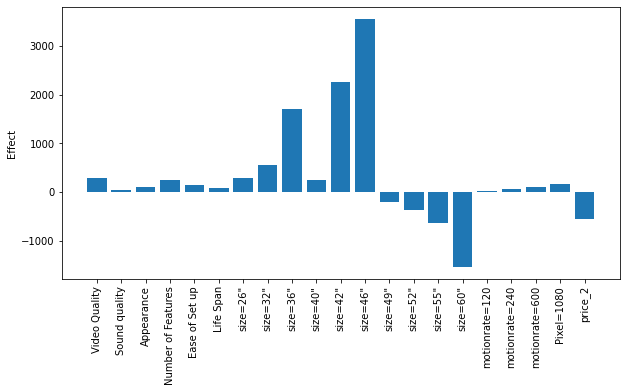

In [95]:
# map features and its coef
var = x.columns.tolist()
coef = model.coef_.tolist()
plt.figure(figsize=(10,5))
plt.bar(var, coef)
plt.ylabel('Effect')
plt.xticks(rotation=90)
plt.show()

In [96]:
# Without Standardization
model = LinearRegression()
model.fit(x_std, y)
cdf = pd.DataFrame(model.coef_, x.columns, columns=['Coefficients'])
print(cdf)

                    Coefficients
Video Quality         296.747949
Sound quality          39.149566
Appearance             98.890016
Number of Features    251.531651
Ease of Set up        141.380231
Life Span              78.672885
size=26"              283.357519
size=32"              558.125069
size=36"             1702.522894
size=40"              255.068825
size=42"             2260.052856
size=46"             3543.431641
size=49"             -201.550352
size=52"             -370.715148
size=55"             -626.858822
size=60"            -1525.922326
motionrate=120         32.501401
motionrate=240         65.060099
motionrate=600         97.059813
Pixel=1080            159.156185
price_2              -542.343276


### Model 2: Revenue

In [97]:
df['rev'] = df['price_2'] * df['Yearly units sold in US']  

In [98]:
y = df['rev']

In [99]:
scaler = StandardScaler()
x_std = scaler.fit_transform(x)

In [100]:
model = LinearRegression()
model.fit(x_std, y)
cdf = pd.DataFrame(model.coef_, x.columns, columns=['Coefficients'])
print(cdf)

                    Coefficients
Video Quality       2.814246e+05
Sound quality       2.050731e+04
Appearance          9.417819e+04
Number of Features  2.006119e+05
Ease of Set up      1.246478e+05
Life Span           4.019499e+04
size=26"            1.640258e+05
size=32"            3.533273e+05
size=36"            1.203053e+06
size=40"            1.433029e+05
size=42"            1.830546e+06
size=46"            3.120423e+06
size=49"           -3.578647e+05
size=52"           -5.926613e+05
size=55"           -9.398207e+05
size=60"           -2.079734e+06
motionrate=120      3.093359e+04
motionrate=240      6.070271e+04
motionrate=600      9.079473e+04
Pixel=1080          1.427979e+05
price_2             3.213319e+06


In [101]:
cdf.iloc[:6,].sort_values(by='Coefficients', ascending=False)

,Coefficients
Video Quality,281424.649118
Number of Features,200611.918066
Ease of Set up,124647.751782
Appearance,94178.187765
Life Span,40194.987246
Sound quality,20507.314436


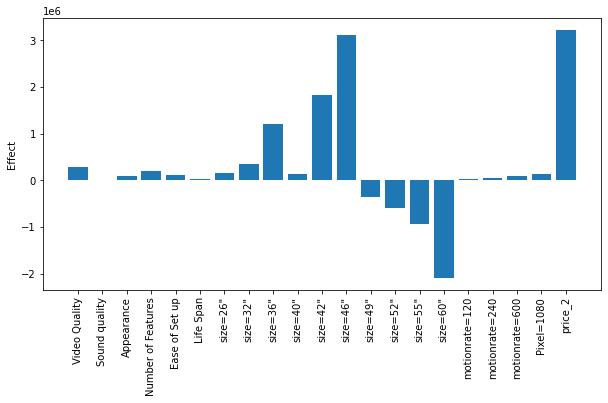

In [103]:
# map features and its coef
var = x.columns.tolist()
coef = model.coef_.tolist()
plt.figure(figsize=(10,5))
plt.bar(var, coef)
plt.ylabel('Effect')
plt.xticks(rotation=90)
plt.show()

In [104]:
# without standardization
model = LinearRegression()
model.fit(x, y)
cdf = pd.DataFrame(model.coef_, x.columns, columns=['Coefficients'])
print(cdf)

                    Coefficients
Video Quality       5.752458e+05
Sound quality       3.939912e+04
Appearance          2.142883e+05
Number of Features  3.375898e+05
Ease of Set up      2.779753e+05
Life Span           7.229184e+04
size=26"            5.705647e+05
size=32"            1.229051e+06
size=36"            4.184825e+06
size=40"            4.984798e+05
size=42"            6.367566e+06
size=46"            1.085441e+07
size=49"           -1.244834e+06
size=52"           -2.061576e+06
size=55"           -3.269172e+06
size=60"           -7.234365e+06
motionrate=120      7.143807e+04
motionrate=240      1.401869e+05
motionrate=600      2.096814e+05
Pixel=1080          2.855959e+05
price_2             1.486664e+04


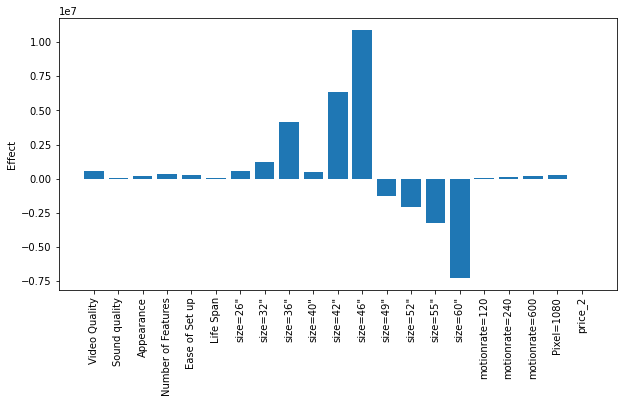

In [105]:
# map features and its coef
var = x.columns.tolist()
coef = model.coef_.tolist()
plt.figure(figsize=(10,5))
plt.bar(var, coef)
plt.ylabel('Effect')
plt.xticks(rotation=90)
plt.show()

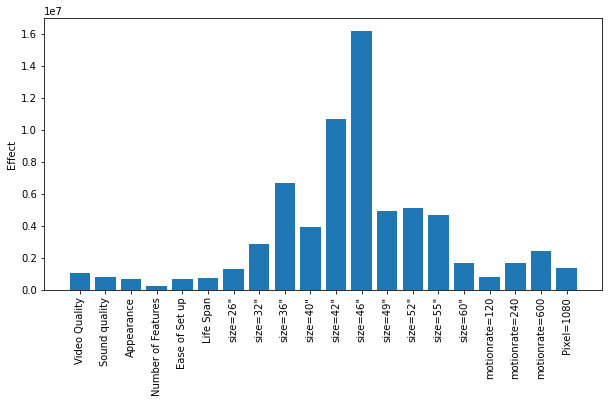

In [59]:
# map features and its coef
var = x.columns.tolist()
coef = model.coef_.tolist()
plt.figure(figsize=(10,5))
plt.bar(var, coef)
plt.ylabel('Effect')
plt.xticks(rotation=90)
plt.show()

# Other Notes

### Get p-value to see if the variable is significant

In [60]:
import statsmodels.api as sm
from scipy import stats

In [62]:
X2 = sm.add_constant(x)
model = sm.OLS(y, X2)
model2 = model.fit()

p_values = model2.summary2().tables[1]['P>|t|']
print(p_values)

const                  1.105645e-84
Video Quality          6.436572e-21
Sound quality          1.789549e-21
Appearance             6.139438e-14
Number of Features     6.838482e-05
Ease of Set up         1.417291e-13
Life Span              3.100013e-16
size=26"               1.796959e-19
size=32"               8.303035e-71
size=36"              4.339855e-215
size=40"              8.622221e-112
size=42"               0.000000e+00
size=46"               0.000000e+00
size=49"              5.877016e-150
size=52"              4.154096e-157
size=55"              3.715936e-140
size=60"               3.692754e-28
motionrate=120         1.175163e-19
motionrate=240         6.505358e-67
motionrate=600        1.762906e-114
Pixel=1080             9.205712e-84
Name: P>|t|, dtype: float64


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


### Correlation Heatmap

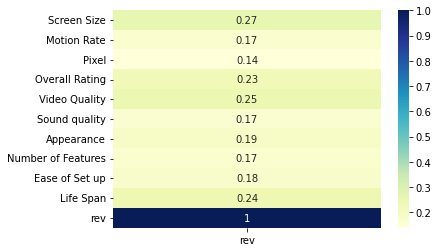

In [ ]:
df2 = df[['Screen Size', 'Motion Rate', 'Pixel', 'Overall Rating',
       'Video Quality', 'Sound quality', 'Appearance', 'Number of Features',
       'Ease of Set up', 'Life Span', 'rev']]
a = pd.DataFrame(df2.corr()['rev'])
sns.heatmap(a, cmap="YlGnBu", annot=True)

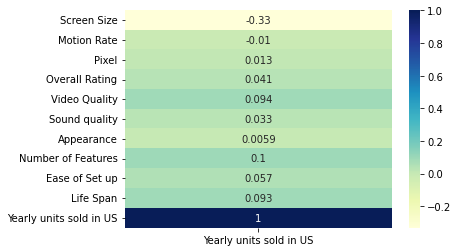

In [ ]:
df2 = df[['Screen Size', 'Motion Rate', 'Pixel', 'Overall Rating',
       'Video Quality', 'Sound quality', 'Appearance', 'Number of Features',
       'Ease of Set up', 'Life Span', 'Yearly units sold in US']]
a = pd.DataFrame(df2.corr()['Yearly units sold in US'])
sns.heatmap(a, cmap="YlGnBu", annot=True)

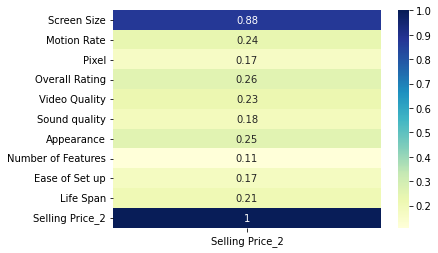

In [ ]:
df2 = df[['Screen Size', 'Motion Rate', 'Pixel', 'Overall Rating',
       'Video Quality', 'Sound quality', 'Appearance', 'Number of Features',
       'Ease of Set up', 'Life Span', 'Selling Price_2']]
a = pd.DataFrame(df2.corr()['Selling Price_2'])
sns.heatmap(a, cmap="YlGnBu", annot=True)